In [1]:
%matplotlib inline

import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from skimage import measure
import itertools
import networkx as nx
from scipy.special import comb
sys.path.append("/Users/yves/Documents/Code/structural_knowledge/action_generalisation/")

#import seaborn
#seaborn.set(font_scale=1.5,style='ticks')
import torch as tf

In [2]:
#generate hypercube

def graph_cart_product(A,B=None):
    if B is None: B=A.copy()
    
    n,m = A.shape[0],B.shape[0]
    return np.kron(A,np.eye(m)) + np.kron(np.eye(n),B)

In [3]:
def graph_corona(A,B):
    """ https://www.sciencedirect.com/science/article/pii/S0024379511001182"""

    m,n = A.shape[0], B.shape[0]
    tmp1 = np.hstack([A,np.kron(np.ones([1,n]),np.eye(m))])
    tmp2 = np.hstack([np.kron(np.ones([1,n]).T,np.eye(m)),np.kron(B,np.eye(m))])
    A_corona = np.vstack([tmp1,tmp2])
    return A_corona

In [4]:
#generate hypercube

def strong_product(A,B=None):
    if B is None: B=A.copy()
    
    n,m = A.shape[0],B.shape[0]
    return np.kron(A+ np.eye(n),np.eye(m)+B) - np.eye(n+m)

In [5]:
def graph_direct_product(A,B=None):
    """ This one works on the laplacians"""
    if B is None: B = A.copy()
    
    L_prod = np.kron()
        

In [6]:
def eig_sort(M):
    eigenval,v = np.linalg.eig(M)
    v = v[:,np.argsort((eigenval))[::-1]]
    eigenval = eigenval[np.argsort((eigenval))[::-1]]
    return eigenval,v

In [7]:
#cartesian product of two path graphs
def gen_path_graph(n):
    edges = [[i,i+1] for i in range(n-1)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L


def gen_path_plus(n):
    edges = [[i,i+1] for i in range(n-1)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    #edges = np.concatenate([edges,[[n-1,3],[3,n-1]]])
    edges = np.concatenate([edges,[[2,4],[4,2]]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_cycle_graph(n):
    edges = [[i,(i+1)%(n)] for i in range(n)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_star_graph():
    return None
def gen_tree_graph(depth=3,max_b=3):
    
    edges = []
    ctr = 0
    for d in depth:
        n_branch = np.random.randint(0,max_b)
        
    
def simple_tree(n=8):
    edges = [[0,1],[1,2],[1,3],[2,4],[2,5],[3,6],[3,7]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_star_graph(n=0):
    n=5
    edges = [[0,1],[0,2],[0,3],[0,4]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_random_graph(gtype='ER',n=5,m=4,p=.3):
    if gtype=='ER':
        g = nx.random_graphs.erdos_renyi_graph(n,.7)
    elif gtype=='BB':
        g = nx.generators.barbell_graph(n,2)
    elif gtype=='FC':
        g = nx.complete_graph(n)
    elif gtype=='EMPTY':
        g = nx.empty_graph(n=n)
        g.add_edges_from([[1,0],[0,1],[4,5],[5,4]])
    elif gtype=='gnm':
        done = False
        while not done:
            g = nx.random_graphs.gnm_random_graph(5,4)
            done = nx.is_connected(g)
            
    elif gtype=='WS':
        g = nx.connected_watts_strogatz_graph(n,m,p=.3)
    elif gtype=='ROOM':
        g = nx.grid_2d_graph(n,m)
        
    elif gtype=='BI':
        done = False
        while not done:

            g = nx.bipartite.random_graph(n,m,p)
            done = nx.is_connected(g)

    A = nx.to_numpy_matrix(g)
    n = A.shape[0]
    D = np.eye(n)*A.sum(axis=1)
    L = D - A

    return A,D,L


def gen_outerplanar():
    """ Outerplanar graphs multiplied by path graphs yield planar graphs"""
    n = 8
    edges = [[0,1],[1,2],[2,3],[2,0],[3,4],[3,0],[4,5],[5,6],[5,3],[6,7],[6,3],[7,3],[7,0]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

In [121]:
edges = np.array([[1,2],[1,8],[2,3],[2,8],[2,4],
                 [2,6],[3,4],[4,5],[4,8],[4,6],
                 [5,6],[6,7],[6,8],[7,8]]) -1

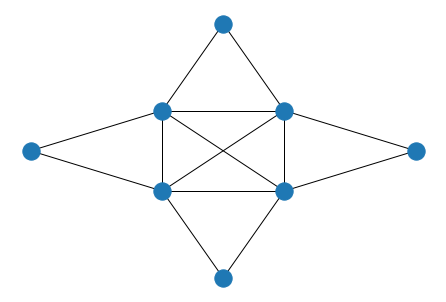

In [132]:
g = nx.OrderedGraph()
g.add_nodes_from(range(8))
g.add_edges_from(edges)
Adj = np.array(nx.to_numpy_array(g))
nx.draw_kamada_kawai(g)


In [133]:
Adj

array([[0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 0.]])

In [134]:
V1 = np.array([1,3,5,7]) - 1
V2 = np.array([2,4,6,8]) - 1

Vsets = [V1,V2]
k = len(Vsets)

In [144]:
A0 = np.array([[0,1],[1,0]])
A1 = np.array([[0,0],[1,1]])
A2 = np.array([[0,0],[0,1]])
A3 = np.array([[0,1],[0,1]])

In [157]:
D = np.zeros([k,k]) #quotient graph of the equitable partition

for i in range(k):
    for j in range(k):
        D[i,j] = np.sum([Adj[ki,kj] for ki in Vsets[i] for kj in Vsets[j]])

D /= len(Vsets[0])

In [158]:
[Adj[ki,kj] for ki,kj in zip(Vsets[i],Vsets[j])]

[0.0, 0.0, 0.0, 0.0]

In [159]:
np.sum([Adj[ki,kj] for ki,kj in zip(Vsets[i],Vsets[j])])

0.0

In [161]:
np.linalg.eig(D)

(array([-1.,  4.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [170]:
Adj

array([[0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 0.]])

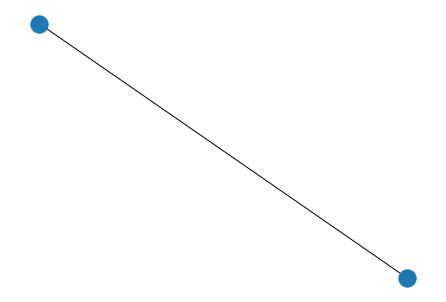

In [169]:
nx.draw(nx.from_numpy_array(D))

In [143]:
np.sum(A[i],axis=0)

matrix([[1., 0., 0., 0., 0., 0.]])